<a href="https://colab.research.google.com/github/Mridul027M/machine-learning/blob/main/miniProject_kFold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The below dataset mostly has text features which is solved by nlp or rnn where the texted features are encoded as integers or floating point values for use as input to a ML Algorithm. If we go through the NLP model the we can either use dictionary to map the text features or we can use encoder but we will have to take in consideration that one feature's value is not dominant over the other otherwise our model will be biased to that value. 
Here I have used one hot endoing technique to convert all the text fielded feautres into interger.
example- job feature in the following dataset

In [1]:
import pandas as pd
import random
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
url = 'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'
df = pd.read_csv(url, index_col=0)
df.shape
print(df.shape)
df.drop_duplicates()
print(df.shape)
ohe=pd.get_dummies(df)    # one hot encoding for the categorical feature data
y=ohe['y']

scaler = preprocessing.RobustScaler()   #robust scaling normlisation
robust_df = scaler.fit_transform(ohe)
robust_df = pd.DataFrame(robust_df)

data=np.array(robust_df)

def sigmoid(hypo):
    return 1/(1+np.exp(-hypo))
    



def getKfold(features,y_actual):
    kf = KFold(n_splits=5,random_state=1000, shuffle=True)
    kf.get_n_splits(features)
    x_train = []
    x_test = []
    y_train = []
    y_test = []
    for train_index, test_index in kf.split(features):
        X_train, X_test = features[train_index], features[test_index]
        Y_train, Y_test = y_actual[train_index], y_actual[test_index]
        x_train.append(X_train)
        x_test.append(X_test)
        y_train.append(Y_train)
        y_test.append(Y_test)
    x_train, x_test, y_train, y_test  = np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)
    return x_train, x_test, y_train, y_test
y=np.array(y)
X_train, X_test, y_train, y_test = getKfold(data,y)

y_train=np.array(y_train)
b=X_test[0].shape[1]

print(X_train)

(41188, 20)
(41188, 20)
[array([[-1.93548387e-01, -5.00000000e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.32718894e-01,  5.00000000e-01, -9.93000000e+02, ...,
         0.00000000e+00, -1.00000000e+00,  1.00000000e+00],
       [ 2.30414747e-02,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-5.43778802e-01,  5.00000000e-01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.21658986e-02,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.13364055e-01,  1.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])
 array([[ 0.13824885, -0.5       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.19354839, -0.5       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.516129

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [2]:
df.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y'],
      dtype='object')

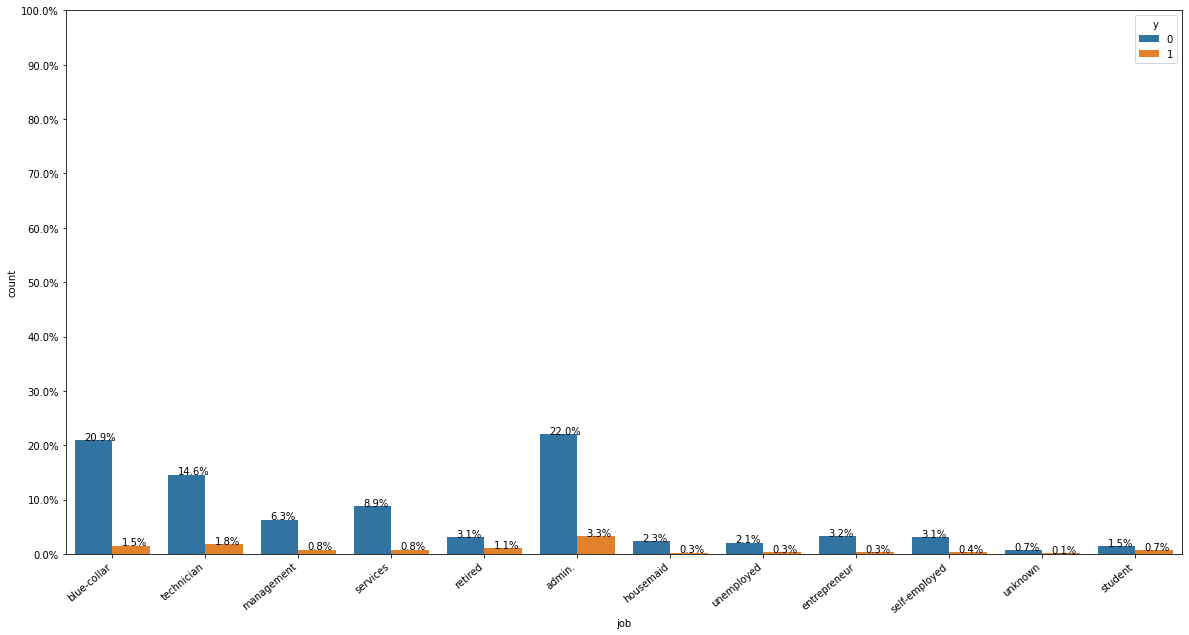

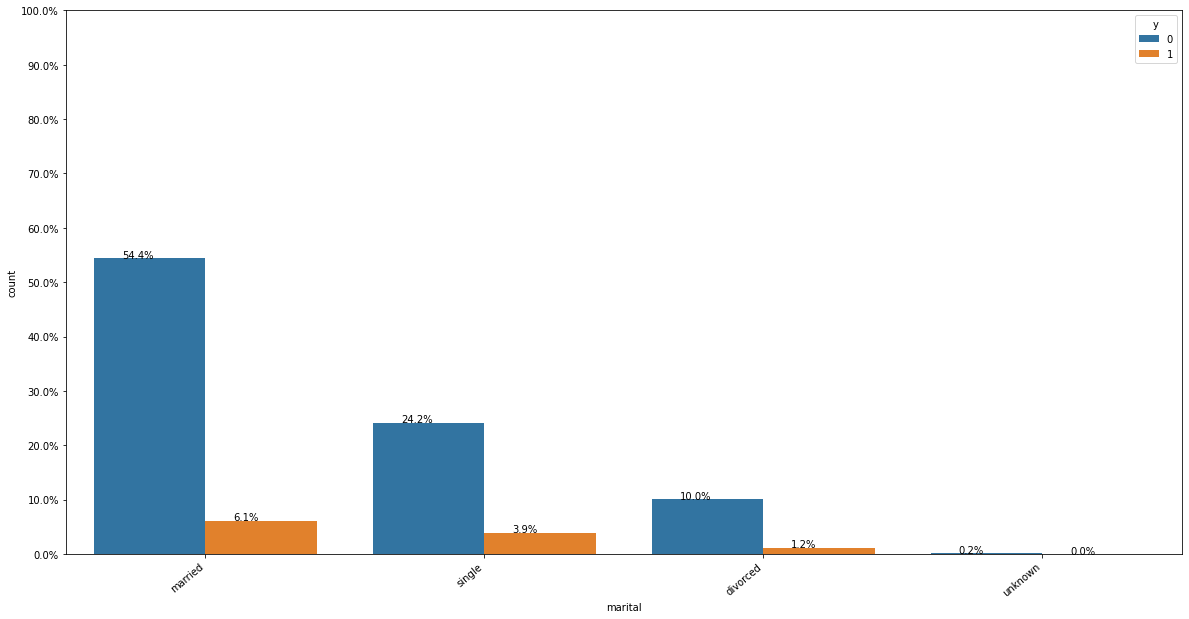

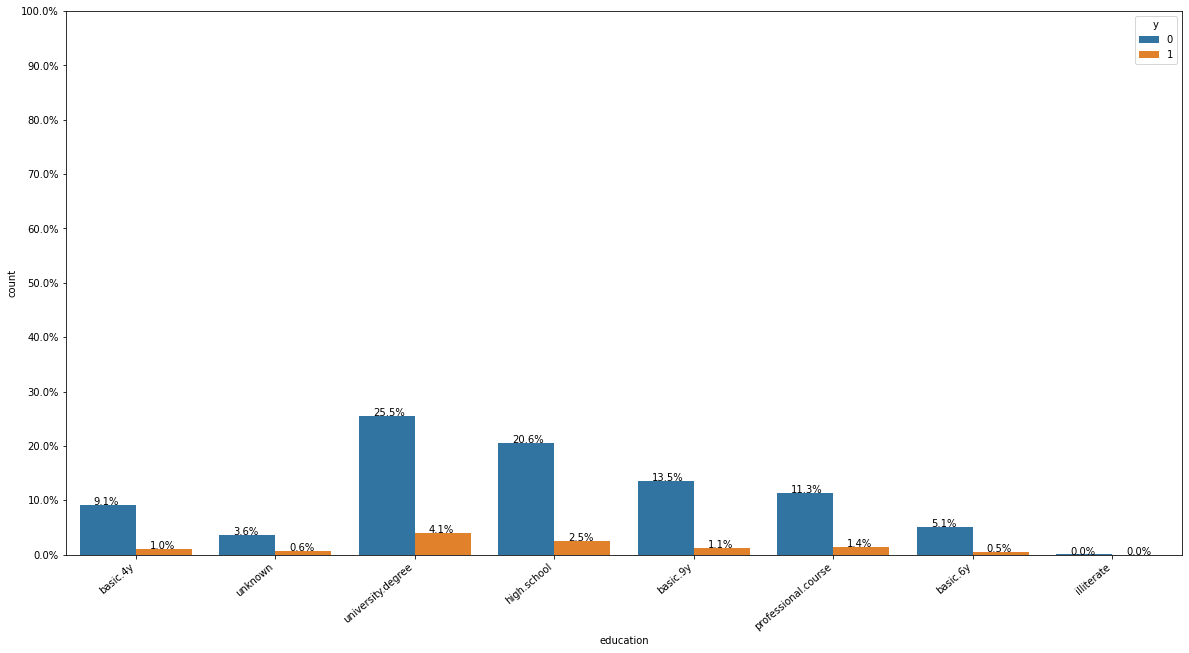

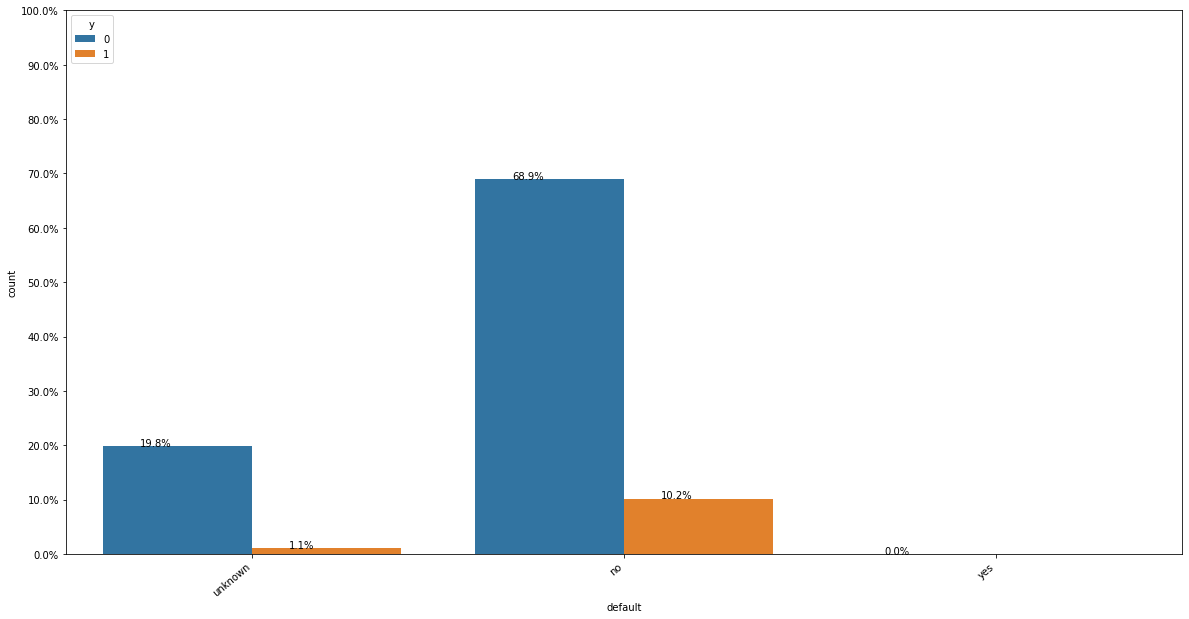

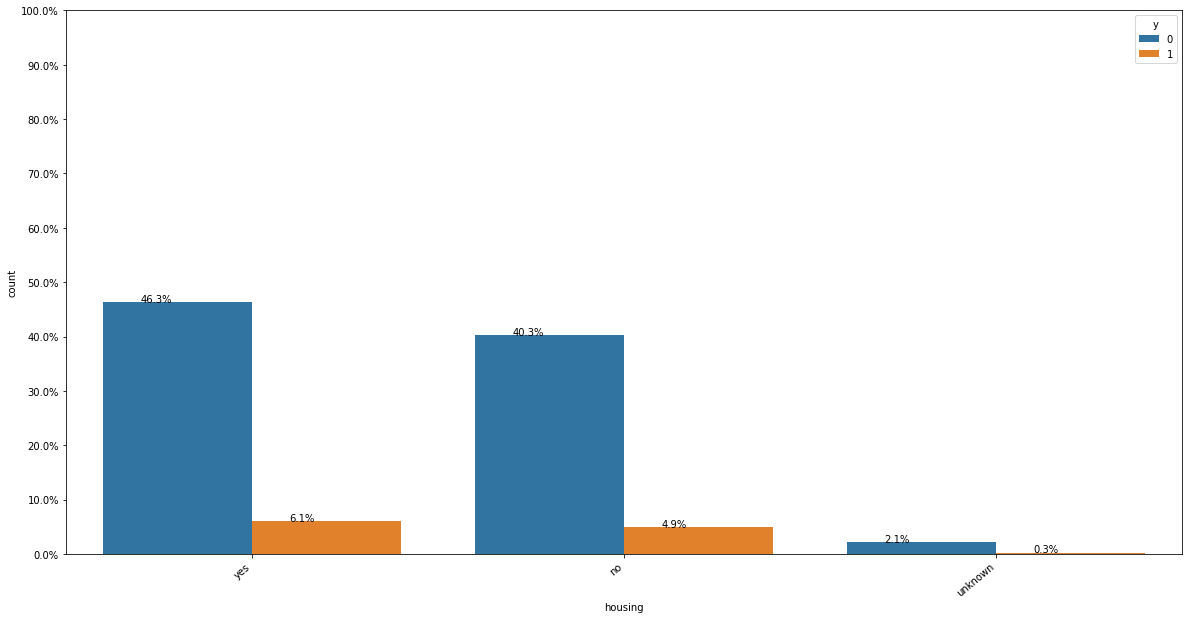

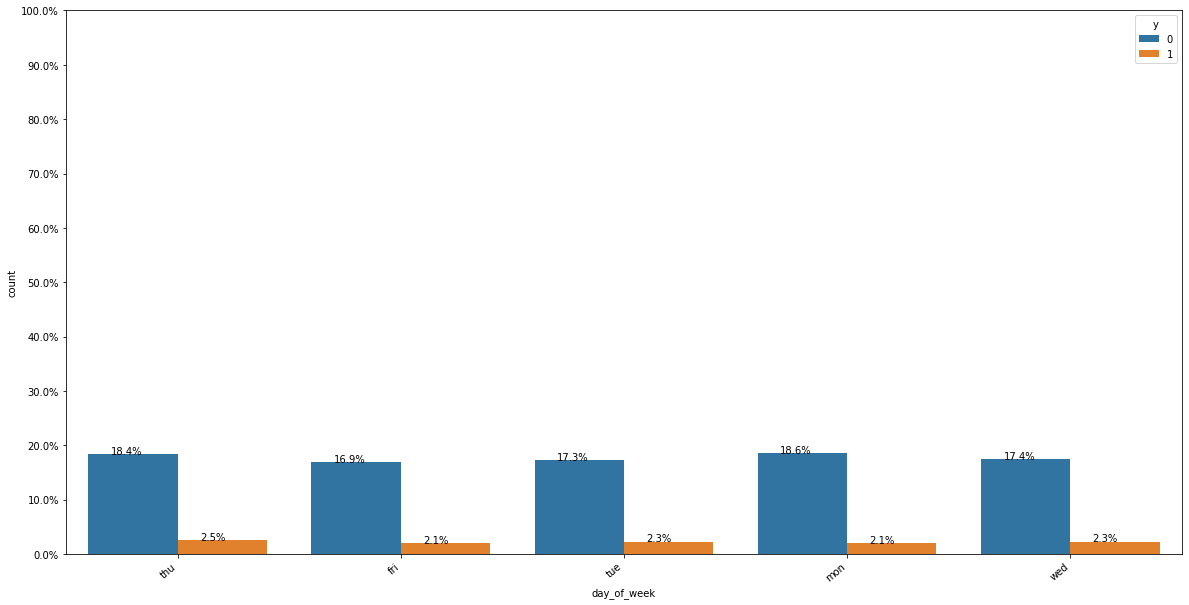

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = df[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()
categorical=['job', 'marital', 'education','default', 'housing','day_of_week' ]
for i in range(len(categorical)):
    countplot_withY(categorical[i],df)

63
for training set 1
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


4.513640586091745
epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


4.4958204710122365


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


mean square error- 0.1327992231124059
percentage error is- 86.72007768875942
[[7144  152]
 [ 942    0]]


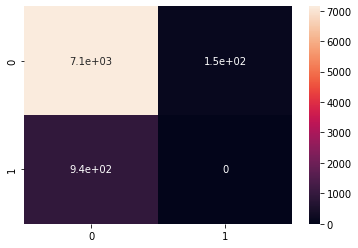

86.72007768875942
for training set 2
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


4.47590440567958
epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


4.466470227108076


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


mean square error- 0.1337703326050012
percentage error is- 86.62296673949987
[[7136  138]
 [ 964    0]]


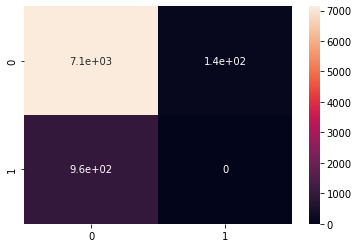

86.62296673949987
for training set 3
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


4.542989762248197
epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


4.548230972565699


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


mean square error- 0.1258800679776645
percentage error is- 87.41199320223355
[[7201  161]
 [ 876    0]]


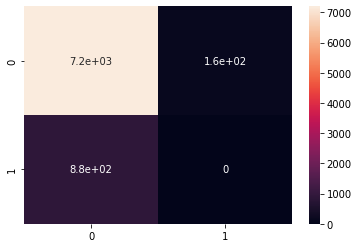

87.41199320223355
for training set 4
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


4.5166477511380965
epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


4.515599540886742


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


mean square error- 0.12953745295617336
percentage error is- 87.04625470438266
[[7170  145]
 [ 922    0]]


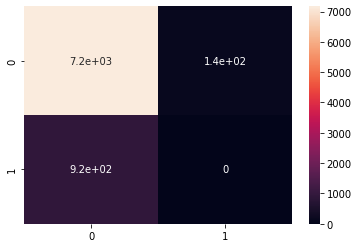

87.04625470438266
for training set 5
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


4.511407039608925
epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


4.510358829357572


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


mean square error- 0.13002306665047955
percentage error is- 86.99769333495205
[[7166  135]
 [ 936    0]]


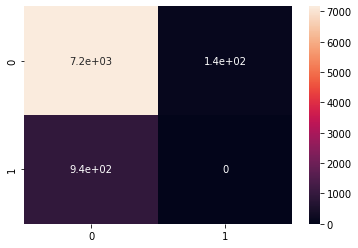

86.99769333495205
[86.72007768875942, 86.62296673949987, 87.41199320223355, 87.04625470438266, 86.99769333495205]


In [4]:
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
print(b)
w0=[]
for i in range(0,b):
    w0.append(random.uniform(-0.3,0.3))

h=[]

test_pre=[]
def test(x_test,y_test,w,avg_accuracy,it):
    test_y=[]
    m=x_test.shape[0]
    y_test=np.array(y_test)
    for i in range(0,m):
        hypo=0
        for j in range(0,b):
            hypo+=w[j]*x_test[i][j]
        
        g=sigmoid(hypo)
        
        if(g>=0.5):
            g=1
        else:
            g=0   
        test_y.append(g)
    
    mse=mean_squared_error(y_test,test_y)
    print("mean square error-",mse)
    per_err=0
    for i in range(0,m):
        if(y_test[i]==test_y[i]):
            per_err+=1
    print("percentage error is-",per_err/y_test.shape[0]*100)        
    confusion_mat=confusion_matrix(y_test,test_y )
    print(confusion_mat)
    sn.heatmap(confusion_mat, annot=True)
    plt.show()
    accuracy=(confusion_mat[0][0]+confusion_mat[1][1])/(confusion_mat[0][0]+confusion_mat[1][1]+confusion_mat[0][1]+confusion_mat[1][0])
    print(accuracy*100)
    test_pre=test_y
    avg_accuracy[it]=accuracy*100

def learning_sigmoid_neuron(train,y_train,w,err):
    
    y_pred=[]
    a=train.shape[0]
    b=train.shape[1]
    for i in range(0,a):
        hypo=0
        for j in range(0,b):
            hypo+=w[j]*train[i][j]
            
        g=sigmoid(hypo)
          
        if(g>=0.5):
            g=1
        else:
            g=0   
        y_pred.append(g) 
        
        if g!=y_train[i]:
            for j in range(0,b):
                w[j]=w[j]-train[i][j]
        
    new_err=log_loss(y_train,y_pred)
    print(new_err)
    if(abs(new_err-err)>0.0001):
        return
    else:
        err=new_err
        print(err)
k=0
avg_accuracy=[0,0,0,0,0]
for j in range(0,5):
    print("for training set",j+1)
    
    for i in range(0,2):
        
        print("epoch-",i)
        learning_sigmoid_neuron(X_train[j],y_train[j],w0,1)
    test(X_test[j],y_test[j],w0,avg_accuracy,j)
print(avg_accuracy)

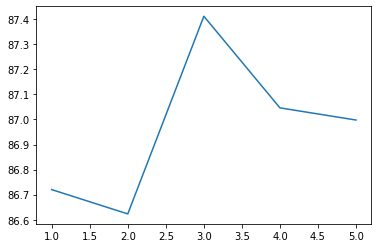

In [5]:
import matplotlib.pyplot as plt
x=[1,2,3,4,5]
y=avg_accuracy
plt.plot(x, y)
plt.show()

In [ ]:
avg_accu=0
for i in range(0,5):
    avg_accu+=avg_accuracy[i]
avg_accu/=5
print(avg_accu)    

86.95979713396551


63
for training set 1
epoch- 0
cost  0.1509852059254382
logg loss 17.327421993136277
epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


cost  1.9602302655840096
logg loss 10.243348231007834


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


mean square error- 0.7501820830298617
percentage error is- 24.98179169701384
[[1454 5842]
 [ 338  604]]


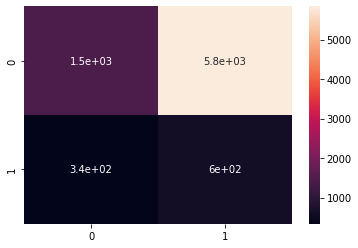

24.98179169701384
for training set 2
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


cost  1.6818600944966728
logg loss 25.86534069030725
epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


cost  2.9358611945305912
logg loss 20.748870644487543


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


mean square error- 0.5496479728089342
percentage error is- 45.03520271910658
[[3121 4153]
 [ 375  589]]


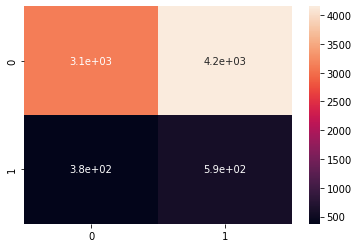

45.03520271910658
for training set 3
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


cost  6.736439797052128
logg loss 18.85364535362967
epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


cost  7.938677106357107
logg loss 18.63458452985109


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


mean square error- 0.35530468560330175
percentage error is- 64.46953143966982
[[5207 2155]
 [ 772  104]]


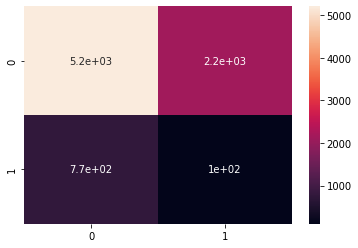

64.46953143966982
for training set 4
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


cost  17.003707432688028
logg loss 12.35517505190456
epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


cost  15.490672218463224
logg loss 19.392904033124363


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


mean square error- 0.4933835134150783
percentage error is- 50.66164865849216
[[3690 3625]
 [ 439  483]]


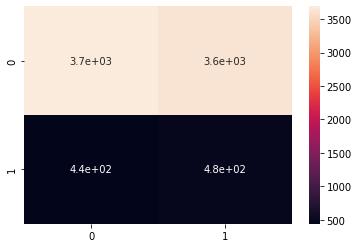

50.66164865849216
for training set 5
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


cost  18.673619852979353
logg loss 16.89606012865392
epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


cost  24.490277512076652
logg loss 14.631947825362086


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


mean square error- 0.5288333130994294
percentage error is- 47.11666869005706
[[3678 3623]
 [ 733  203]]


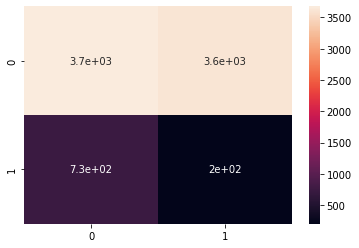

47.11666869005706
[24.98179169701384, 45.03520271910658, 64.46953143966982, 50.66164865849216, 47.11666869005706]


In [ ]:
import math
import numpy as np
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
test_pre=[]
def test(x_test,y_test,test_y,w,avg_accuracy1,it):
    test_y=[]
    h=[]
    m=x_test.shape[0]
    y_test=np.array(y_test)
    for i in range(0,m):
        hypo=0
        for j in range(0,b):
            hypo+=w[j]*x_test[i][j]
        h.append(hypo)
        g=sigmoid(hypo)
        
        if(g>=0.5):
            g=1
        else:
            g=0   
        test_y.append(g)

    mse=mean_squared_error(y_test,test_y)
    print("mean square error-",mse)
    per_err=0
    for i in range(0,m):
        if(y_test[i]==test_y[i]):
            per_err+=1
    print("percentage error is-",per_err/y_test.shape[0]*100)  
    confusion_mat=confusion_matrix(y_test,test_y )
    print(confusion_mat)
    sn.heatmap(confusion_mat, annot=True)
    plt.show()
    accuracy=(confusion_mat[0][0]+confusion_mat[1][1])/(confusion_mat[0][0]+confusion_mat[1][1]+confusion_mat[0][1]+confusion_mat[1][0])
    print(accuracy*100)
    test_pre=test_y
    avg_accuracy1[it]=accuracy*100

cost=1
alpha=0.5
w1=[]
print(b)
for i in range(0,b):
    w1.append(random.uniform(-0.3,0.3))
alpha=0.5

def learning_logistic_reg(train,y_train,w,cost):
    a=train.shape[0]
    y_pred=[]
    h=[]
    for i in range(0,a):
        hypo=0
        for j in range(0,b):
            hypo+=w[j]*train[i][j]
        h.append(hypo)
        g=sigmoid(hypo)
        
        if(g>=0.5):
            g=1
        else:
            g=0   
        y_pred.append(g) 
    
    cost_itr=0
    for i in range(0,a):
        if(h[i]<0):
            cost_itr+=(1-y_train[i])*math.log((1-h[i]))
        else:
            cost_itr+=(y_train[i]*math.log(h[i]))
    cost_itr=cost_itr/(a)
    log_loss_itr=log_loss(y_train,y_pred)
    print("cost ",cost_itr)
    print("logg loss",log_loss_itr)

    for i in range(0,b):
        temp=0
        for j in range(0,a):
            temp+=(y_train[i]-h[i])*train[j][i]
        temp=alpha*temp/a
        w[i]=w[i]+temp    
            
    if(abs(log_loss_itr-cost)>0.001):
        return

test_y=[]
avg_accuracy1=[0,0,0,0,0]
for j in range(0,5):
    print("for training set",j+1)
    
    for i in range(0,2):
        
        print("epoch-",i)
        
        learning_logistic_reg(X_train[j],y_train[j],w1,1)
    test(X_test[j],y_test[j],test_y,w1,avg_accuracy1,j)
print(avg_accuracy1)

In [ ]:
avg_accu=0
for i in range(0,5):
    avg_accu+=avg_accuracy1[i]
avg_accu/=5
print(avg_accu)    

46.452968640867894


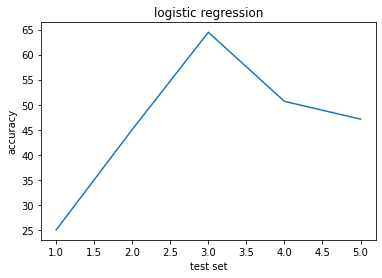

In [ ]:
import matplotlib.pyplot as plt
x=[1,2,3,4,5]
y=avg_accuracy1
plt.plot(x, y)
plt.xlabel('test set')

plt.ylabel('accuracy')
 
# giving a title to my graph
plt.title('logistic regression')
plt.show()

2
for valdilating alpha value  0 i.e 0.1
for training set 1
epoch- 0
epoch- 1
printing w [[-1.6084731116177564, -27.3602984748282, 0.14065038794365214, -7.561673548311976, 10.80844997764423, 5.462704276595892, -20.358149695770546, 12.669092497986295, -0.7531716392587084, 5.888951639443651, -16.789878959573322, -17.422379284752335, -2.9337017183157243, -1.7759431623586168, -6.198638252916095, -1.9763041697253232, -2.3418660435202834, -6.418914757519372, -0.41218966422348213, -13.873602864244067, -1.5303493922665579, -0.2339018558535002, -4.164756358577569, 24.230534979740845, -19.918826883759255, -0.3497948105615108, -6.6365576062296245, -5.229698614263346, -10.632117157318266, -15.772723846420007, 0.13548978581261434, -9.44913783291683, -22.05328486234645, -2.0761937217402093, 17.171061716470792, -17.078799200635906, -0.05705243778899375, -30.627654988985643, -1.0171644734069532, 32.426846441141755, 7.4185797204758135, -1.2648271299885252, -6.520528835359316, 33.10483249824779, -33.378

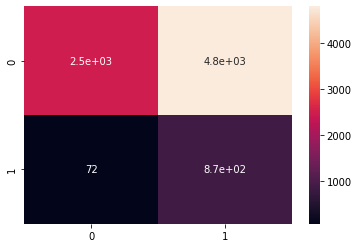

40.7623209516873
for training set 2
epoch- 0
epoch- 1
printing w [[-2.9465961976303805, -41.296744106682894, 0.14065038794365214, -10.748491404070233, 15.32002113627592, 6.92723757328726, -29.11321712292732, 18.019645234353465, -1.9038480304367156, 7.712880408206741, -24.455223771906965, -24.68870777483857, -4.091285348661869, -2.6963136264601557, -9.581691169778273, -2.7311163527306705, -3.207147522736563, -9.185905595288258, -0.8076036661006136, -20.100498689933872, -2.5444706392768985, -0.25046639108399976, -6.051182087897864, 34.147602155976735, -27.88653973960885, -0.412723401627618, -9.570210110516289, -7.797676637326117, -14.94340117424112, -22.419224437255657, 0.13489981209625285, -12.298206675164563, -34.026691304098016, -3.226473752444862, 25.22579559086028, -25.133533074994475, -0.057052437819912136, -44.3309869094117, -1.5448858892294741, 46.6578997773903, 10.578763501492448, -1.792548545811046, -9.15299120055344, 47.700955219644975, -47.97435362254628, -3.2659135834391133,

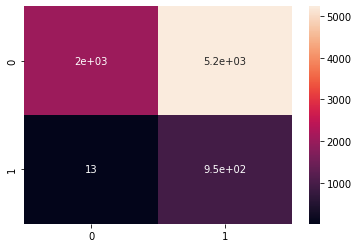

36.25880067977664
for training set 3
epoch- 0
epoch- 1
printing w [[-4.395742892583885, -52.216125763231254, 0.14065038794365214, -13.49273949176768, 18.80124998542198, 7.351837255612189, -35.55669866671163, 22.149026221907818, -2.956955879290332, 9.048597330490885, -31.546384941032922, -30.656708220120848, -4.995161861458277, -3.3705864054853882, -11.636095447291206, -3.4052774712678326, -3.9383711827833663, -11.701913423953664, -1.0958229909869077, -23.82035699821097, -3.41747501284746, -0.27063042555065453, -7.569997301059566, 42.48916060297396, -34.6491040715842, -0.4729023034879815, -12.341141463176918, -9.61028730474554, -18.653233678364426, -28.680249502426218, 0.1348817380307347, -13.953553552522862, -42.585110888718404, -3.972643459219357, 31.735099136958855, -31.642836621093046, -0.05705243781991692, -55.387875312428754, -2.0595919929687305, 58.22949428414654, 13.69165842553292, -2.3072546495503037, -11.751180020854651, 59.38398915878519, -59.6573875616865, -4.485451642144313

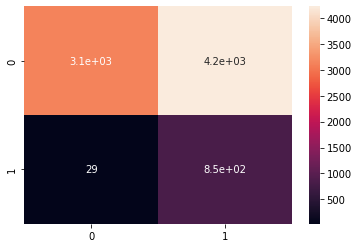

48.37339159990289
for training set 4
epoch- 0
epoch- 1
printing w [[-4.762373506577948, -61.0890286261975, 0.14065038794365214, -15.56801508513747, 21.51622421236778, 8.05379558867714, -40.99821947070376, 25.475876339122365, -3.8343628912664176, 10.426088157642356, -38.48736145412373, -36.15270638019424, -5.716785961962269, -3.952325668202648, -12.29298074919533, -3.9517220044447843, -4.589168480564489, -13.79926196813917, -1.222174436411875, -26.23431422854546, -4.086375280223997, -0.2756833224436875, -8.633865547337452, 49.74126418514047, -40.81896675608108, -0.4912749548798088, -14.925544202426902, -10.560529831442693, -22.17330452597514, -34.66533492386743, 0.13488163969514022, -15.111841164184387, -48.57439974449959, -4.691340911903818, 37.69055355600422, -37.59829104013842, -0.05705243781991692, -64.11527015311991, -2.448388529993113, 67.34568566186161, 16.228175035147416, -2.696051186574686, -13.898900093444778, 68.52119039743773, -68.79458880033896, -5.456710131610247, -32.9982

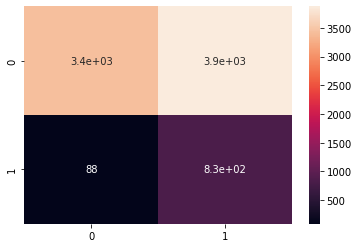

51.912103921330576
for training set 5
epoch- 0
epoch- 1
printing w [[-4.257418208374161, -69.15684055037349, 0.14065038794365214, -17.51876213555868, 24.494703579717584, 9.493066083520977, -45.15483176274179, 28.99662690020471, -3.862187979725892, 11.6879951485815, -43.752537691356025, -40.88853347156496, -6.3676445439171845, -4.309575735108753, -12.9692341575501, -4.2778247520987165, -5.079898525570814, -16.065078113163977, -1.3346196575902465, -28.332810473770206, -4.844641692414889, -0.2956483257720896, -9.38474776627595, 55.573756768954155, -45.87723073917518, -0.5146213366608569, -16.529172623277823, -11.375548313655388, -25.333916298853694, -40.389763390736604, 0.13488163602171355, -16.070671456950908, -53.06342215668659, -5.6969882658918864, 42.5942235748677, -42.5019610590019, -0.05705243781991692, -71.10376208159072, -2.7041147174563034, 74.58990377779568, 18.027422107925176, -2.9517773740378765, -15.442420978759348, 75.78732715229867, -76.0607255551999, -6.045402534187483, -3

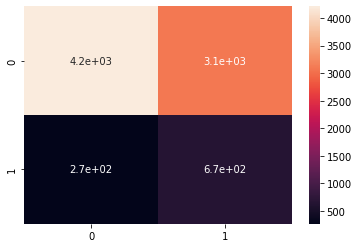

59.24487070535389
47.31029757161026
for valdilating alpha value  1 i.e 0.3
for training set 1
epoch- 0
epoch- 1
printing w [[-6.824694903163244, -88.38498935669575, 0.14065038794365214, -22.516404549977306, 31.35503459129909, 14.131141114335007, -57.609254082185736, 37.03243523569238, -4.208150429069265, 14.231547893500931, -57.32346072667719, -51.90562736974194, -7.828709861848831, -4.942497740775642, -15.194076081146777, -5.632667304225005, -6.5988583994090515, -19.987111053425377, -1.7037391135053095, -33.52793198508446, -6.339217882417559, -0.3925201943161605, -11.17250960299393, 69.26313221589538, -57.77463601725895, -0.5188296688004784, -20.121489772733717, -13.072417310573107, -33.86086082540394, -53.22537935458051, 0.13488151823202646, -18.097261996473122, -65.10279357918337, -7.837650122010924, 56.200113808132826, -56.10785129226703, -0.05705243781991692, -91.15841071369202, -3.3174670004305002, 95.25790469287105, 22.51682409677455, -3.5651296570120734, -19.318470684634537, 93

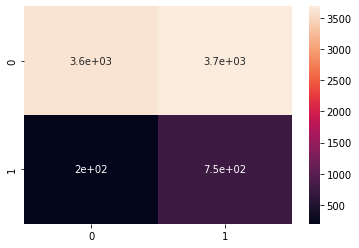

52.852634134498665
for training set 2
epoch- 0
epoch- 1
printing w [[-11.533251903307738, -99.59924699820459, 0.14065038794365214, -26.31756000520787, 37.19489165964393, 17.203517168018468, -71.9263416015938, 43.872323782392066, -4.472744281162692, 15.703888409865698, -71.1083460358762, -62.207491587199264, -9.088052294883727, -5.738496913331208, -16.593574711593483, -6.85751352941597, -8.206149316727961, -24.58480572941681, -2.029161554866866, -37.81474738800234, -7.133381220818518, -0.37448232822172217, -13.407227572779256, 84.37615643424611, -70.59451977564076, -0.5772521589840517, -23.719207162495486, -14.236860681694562, -42.11770955154431, -64.22875582743492, 0.13488151777515114, -21.157538764899694, -77.46915004214522, -8.748415828068362, 69.17311111106947, -69.08084859520369, -0.05705243781991692, -112.00460888593088, -3.7543082626735242, 116.5409441273529, 26.800967315833123, -4.001970919255097, -23.16577264145009, 112.41970186310127, -112.69310026600249, -9.275585711047064, -

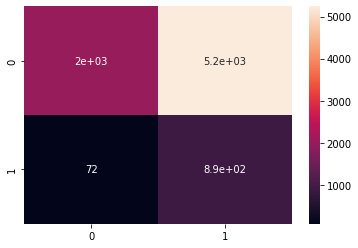

35.46977421704297
for training set 3
epoch- 0
epoch- 1
printing w [[-16.205535108479783, -109.31071281390912, 0.14065038794365214, -29.436615784567238, 42.222138230180626, 19.776855235216072, -86.19321658824006, 49.76591516911985, -5.3834450320584235, 17.019230443751997, -85.15920404419155, -70.25769778429061, -9.988680956644524, -6.557560678992519, -17.706334854649455, -7.735106468958401, -9.321975106547065, -31.128070230138597, -2.363032431826279, -40.78047451256392, -8.149559822321374, -0.740241207928654, -15.608222991467846, 100.0844190131977, -84.08880307843648, -0.5902360164515643, -26.98346931529591, -16.245571158834306, -47.63735949069995, -75.25632157132112, 0.13488151777514273, -24.050926616548, -90.07024556941758, -9.58547962486461, 79.74200770983474, -79.64974519396895, -0.05705243781991692, -131.62905990975167, -4.60020379760748, 137.01129068610777, 30.756026923507655, -4.847866454189049, -26.27493671419066, 130.02340855788862, -130.29680696078978, -10.43837460366227, -66.

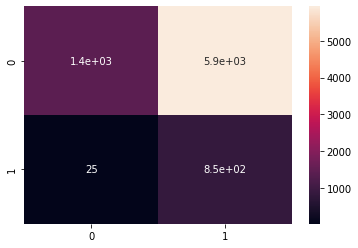

27.652342801650885
for training set 4
epoch- 0
epoch- 1
printing w [[-18.254122688324518, -116.84131544650027, 0.14065038794365214, -32.82279058548223, 47.01981845153985, 21.711042879008417, -94.7646475193334, 55.18608572013442, -4.7263933622613825, 18.589498466660448, -93.9663388082604, -76.504512541197, -10.562210465018868, -7.083083487886107, -18.796501736277406, -8.477685074466578, -10.537494864619232, -36.38715239279323, -2.545257880968787, -43.53027829392137, -9.027600492262897, -1.057497525540019, -17.006421281053306, 110.13554220339246, -92.74025856273492, -0.5917054327623225, -28.83744876867489, -17.984615059380484, -52.45065786369757, -85.08877481789928, 0.13488151777514273, -26.33141767209142, -97.37983839390289, -10.344296235494111, 87.75863601393456, -87.66637349806878, -0.05705243781991692, -146.40567363546006, -5.27566809014979, 152.46336870435837, 34.10772947733149, -5.523330746731359, -28.95117497547223, 144.12008779625995, -144.39348619916112, -11.46028378066356, -71.

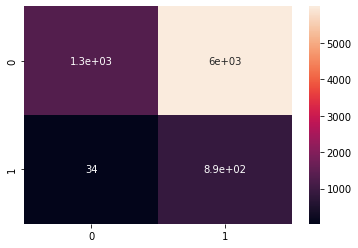

26.76945489862814
for training set 5
epoch- 0
epoch- 1
printing w [[-18.5926772839465, -124.27372497316577, 0.14065038794365214, -35.463403458242816, 51.46957329866106, 23.172036789591036, -100.90929034168974, 60.10550435079262, -3.626039364171703, 20.190269801305497, -101.01489303076585, -81.82202497457659, -11.334486971607028, -7.44630225815478, -19.72859054561707, -9.088935210004383, -11.15359591891449, -40.297333824334125, -2.5657545502067762, -45.69968487506014, -10.056241401011716, -1.265549012039505, -18.083577660500104, 117.94578865519604, -99.46499833486014, -0.6000557329939851, -30.586843025667083, -19.361037864756295, -56.19345237726996, -93.86088718887787, 0.13488151777514273, -27.753417469602113, -102.74362368450099, -10.91556620954675, 94.76679281666901, -94.67453030080323, -0.05705243781991692, -158.32868388860982, -5.977538440307901, 165.08824930766644, 36.578975909055174, -6.22520109688947, -30.720551057037852, 155.76304875763145, -156.03644716053262, -12.6168120527380

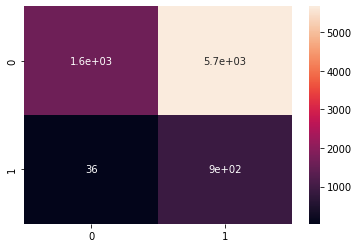

30.727206507223503
34.69428251180884
for valdilating alpha value  2 i.e 0.5
for training set 1
epoch- 0
epoch- 1
printing w [[-21.186088320659394, -137.6093451626441, 0.14065038794365214, -39.96048634358473, 58.671982183475826, 27.05363789668936, -109.28718267975874, 67.98404281559665, -1.9286707293292904, 21.928100317267283, -108.70635428429968, -89.50209417070717, -12.754314465991293, -8.15219324878934, -21.596772341599912, -10.347461961909955, -12.643746122091672, -43.528651039738946, -2.6727240462611097, -52.38916184289222, -11.105657999626958, -1.3318695576240935, -20.233595084209895, 130.67732236074863, -110.04402033191438, -0.6025500177826356, -33.29650560156684, -21.60256529831403, -62.192679987930426, -102.79680377748494, 0.13488151777514273, -32.5285454718348, -110.69644342285382, -11.558892769475719, 104.26916180742373, -104.17689929155796, -0.05705243781991692, -174.50844320700094, -6.705078053902303, 181.99554823965198, 40.27520239571653, -6.952740710483872, -33.6892379301

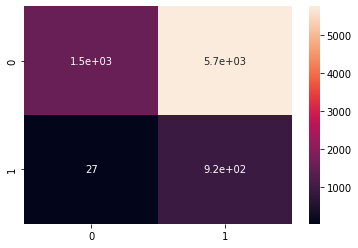

29.88589463462005
for training set 2
epoch- 0
epoch- 1
printing w [[-22.741258748481243, -148.67301801928326, 0.14065038794365214, -43.33678265648766, 64.49774704216566, 31.414563841940595, -119.12604264064811, 74.5198570137449, -1.8261660778121356, 23.621987615440514, -116.58207321625983, -97.28626091786172, -14.118272661436539, -8.77568229844601, -23.260681616389373, -10.999876292606668, -13.822900656009088, -47.089552395556304, -2.966870448676276, -60.15040148550817, -11.873156854996306, -1.4042112007391556, -21.96392916546829, 144.00660605466163, -121.60655899786077, -0.6389609644907887, -34.30413856922228, -23.543497220438592, -68.82797265495905, -112.19546634444299, 0.13488151777514273, -38.15286016124653, -119.38188616906388, -11.86555417304027, 115.37513231125146, -115.2828697953857, -0.05705243781991692, -189.5611196963943, -7.044558283764315, 197.3877049589075, 43.32085934791294, -7.292220940345883, -36.39541465243926, 185.26913231886698, -185.54253072176814, -15.292125515703

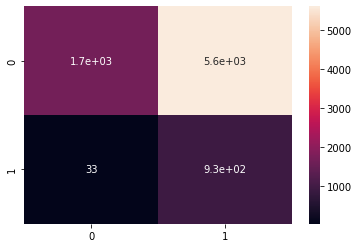

31.646030589949014
for training set 3
epoch- 0
epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


printing w [[-25.653100970227143, -155.27747276514043, 0.14065038794365214, -46.651899922082116, 69.06163403496085, 34.434912149787344, -126.79762076447658, 79.31770243642485, -1.8043917623323862, 25.661250180445446, -122.04362297926266, -103.76774777856397, -15.465016280443733, -9.413432691621281, -24.85802479355563, -11.528912991853927, -14.642995678981809, -49.297720289725625, -3.3473604281259366, -65.77905695786728, -12.75214624472845, -1.3216397411936203, -23.550138176603326, 151.49997048730452, -127.48820955953052, -0.6644658243291336, -34.84368009895194, -24.911131610417257, -74.17731243517557, -120.02078215954916, 0.13488151777514273, -42.90032878944473, -125.24022388206556, -12.065653128247702, 124.22731656794531, -124.13505405207954, -0.05705243781991692, -203.88338562481775, -7.088156676764886, 211.75356928033145, 46.079619084946884, -7.335819333346454, -39.11057599647265, 197.32602645607028, -197.59942485897145, -16.39087417067802, -93.65255440652071, 0.17434999515727034, -

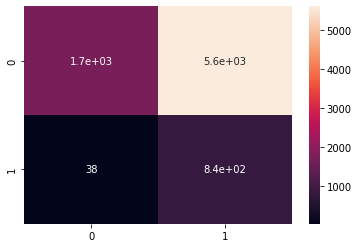

31.36683661082787
for training set 4
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1
printing w [[-32.10979795477573, -166.81095858209912, 0.14065038794365214, -49.54532460320937, 73.08485479690698, 36.27799507469639, -142.26170357423211, 83.62390016975733, -3.1707878528414026, 27.381816740985663, -130.07028149640755, -112.84040420586604, -16.908231426671254, -10.001614734691236, -26.28316339533804, -12.525105832247386, -15.849794493439802, -51.05529907897975, -4.017654170907377, -76.18623987475475, -13.844909827718828, -1.367908447062339, -25.370614263777036, 164.1551428971597, -138.26116525511853, -0.72620645142292, -35.803810427697, -26.265339528308377, -82.35066507072597, -131.4863397242358, 0.13488151777514273, -50.450600396375165, -132.26757102859892, -12.267716056070894, 136.60569866428463, -136.51343614841886, -0.05705243781991692, -222.87552856244707, -7.577358429627608, 231.2349139708234, 49.042300030740336, -7.825021086209177, -41.58405518940339, 216.74886349741294, -217.02226190031408, -17.819577052604174, -101.23527160496758, 0.48383157447389913, 

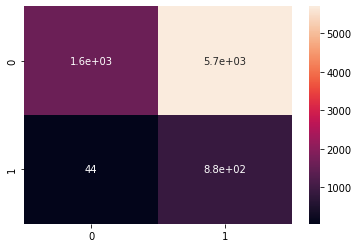

30.20517178584436
for training set 5
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1
printing w [[-35.86015409755298, -176.33029527989703, 0.14065038794365214, -53.16412467199219, 77.80861894052292, 39.10597488972738, -157.56062603406926, 89.31341808821851, -3.5228259777267485, 29.399556381038284, -140.25026812132427, -121.66381163837177, -17.800367206069218, -10.65172415169081, -27.687336756972435, -13.362534129856918, -16.894010529445744, -54.80868177817213, -4.554951384319136, -83.4650975741208, -15.29435553652351, -1.4233946606410492, -26.481747859346942, 176.75751174928075, -149.70169057188122, -0.7769163912114145, -37.89004993640868, -27.242689330080125, -89.09093424703615, -142.71104843530756, 0.13488151777514273, -55.315028023746294, -143.0024637738091, -12.54575496904825, 147.0876596550494, -146.99539713918364, -0.05705243781991692, -239.17401618805835, -8.309884522797478, 248.26592768960464, 52.21134781629378, -8.55754717937905, -44.02057688178697, 235.0758702085651, -235.34926861146624, -18.922533764580063, -110.70791783026006, 0.6571206285209407, -

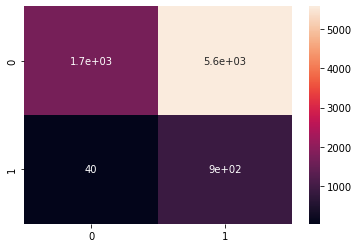

31.759135607624135
30.97261384577309
for valdilating alpha value  3 i.e 0.7
for training set 1
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1
printing w [[-40.263108280316324, -185.56300019660233, 0.14065038794365214, -57.16880676495388, 85.6421247254572, 43.02064009865767, -167.81697267634684, 97.86131359553465, -1.1013544480713504, 31.113276360242335, -149.22158749105094, -130.25697608735695, -18.943788463787516, -11.033191714768785, -29.292795363963403, -14.862322755734636, -17.82956875152821, -61.080023324419905, -5.4423521059581965, -89.6093945691932, -16.365252317815447, -1.4353364578176744, -29.368559048358346, 189.99223854843032, -159.9556623154246, -0.8708602578063004, -39.515211125233726, -28.73751585121918, -96.76293638164846, -156.59510908477301, 0.13488151777514273, -59.342505263652384, -151.41199148973934, -12.948755455056729, 157.1484949298363, -157.05623241397052, -0.05705243781991692, -257.14883262796184, -9.091123847050135, 267.02198345376036, 56.34388525535459, -9.338786503631706, -47.3718749965951, 253.46475279772156, -253.7381512006227, -20.752819276107353, -116.70259343005023, 0.827658331998403

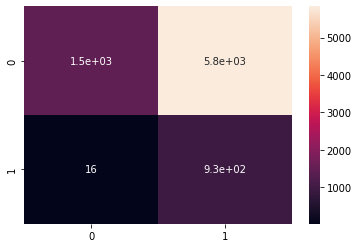

28.939062879339644
for training set 2
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1
printing w [[-43.46396946366937, -194.39264002532485, 0.14065038794365214, -59.14160487721115, 91.20962882626102, 45.24455462040487, -179.21783908472952, 103.73313267302001, -0.8320396946958608, 32.14289976209599, -157.51828281084693, -139.55911841735661, -19.89133450372676, -11.612266207980738, -30.787301797167032, -15.910935590153054, -18.33802518038016, -64.62020111543815, -6.390967430173504, -95.26947043144719, -17.09525031547271, -1.4963447691170801, -31.93916319251058, 202.30581615238256, -169.65840556270967, -0.9110904703212819, -40.72727913784034, -30.897413550741103, -105.3019146162227, -165.42614724967655, 0.13488151777514273, -62.625038336279985, -160.36282516179799, -13.090315764629095, 167.8922505396803, -167.79998802381454, -0.05705243781991692, -274.0499234924884, -9.93595057225869, 284.7679010434953, 59.951387352884694, -10.183613228840262, -50.13455036891665, 270.48844101156584, -270.7618394144669, -22.611103862111452, -122.84193884024403, 0.8047240333001664, 

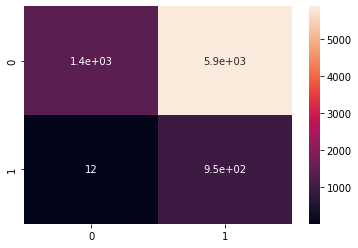

28.417091527069676
for training set 3
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1
printing w [[-43.309285099783175, -201.42277110801245, 0.14065038794365214, -61.69897331913133, 94.67915093604718, 45.908083584206594, -187.34171918189693, 107.42721685197422, -2.0376466719705704, 34.209547801295095, -164.54418466592898, -147.45672191305778, -21.056743493623358, -12.205037814390018, -32.16535713521855, -16.160139324940886, -18.599588246720177, -66.75438296724064, -6.959999764056797, -99.7035586746603, -18.25858015664532, -1.6206312869174258, -33.33720373438085, 212.66982808349405, -178.53140435707263, -1.0040630651997333, -42.726967883678725, -32.24526983711986, -111.16739451302884, -170.35290045402974, 0.13488151777514273, -66.79349620946726, -168.73170821487193, -13.408623579132213, 175.77228418981383, -175.6800216739481, -0.05705243781991692, -289.4285338654978, -10.551455955985487, 300.76201680023166, 64.28413200524069, -10.799118612567058, -53.85178963754584, 284.0033107521849, -284.276709155086, -23.174681180792017, -126.96362197139715, 0.707848188117752

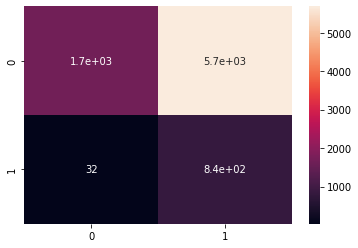

30.61422675406652
for training set 4
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1
printing w [[-43.813323877454856, -207.55025898282602, 0.14065038794365214, -64.50212643989582, 99.45016067057165, 47.134568423541815, -190.19373289260415, 112.22849739315573, -1.601012300978053, 36.51417549067743, -170.09519151368679, -154.9923780851914, -22.143571192433726, -12.786685008190014, -32.86327752172357, -16.65648449346215, -19.336917318407533, -68.70716805291944, -7.195475534404054, -103.22279629460769, -19.143053968651813, -1.621782236365898, -35.54122751746238, 222.99835700725998, -186.53883677477512, -1.1211357881819342, -45.084700223219585, -33.77850799279836, -116.5940489632534, -176.26140694033307, 0.13488151777514273, -69.23785018319468, -174.17210288631642, -13.57759927885637, 182.39042451163482, -182.29816199576908, -0.05705243781991692, -303.3610793316061, -10.998876097974202, 315.1419824083286, 68.17538196779084, -11.246538754555774, -57.29561945810739, 294.59546051118224, -294.8688589140833, -23.786994160240205, -128.30346549932005, 0.7591263410693893,

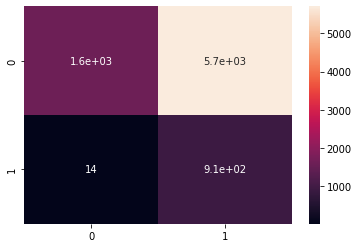

30.545101371858685
for training set 5
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1
printing w [[-44.588897559484266, -214.24058291367376, 0.14065038794365214, -66.9554500912802, 103.90453782707733, 48.14168920763808, -192.39017089215452, 116.69292032357887, -1.953783671605366, 39.47438884082225, -176.8489395330394, -163.49480085602477, -22.845959311136063, -12.97262188310709, -33.557389027513686, -17.030775131300224, -20.01285083638906, -70.82706589425763, -7.326660708733068, -106.46433485532705, -20.45176340618317, -1.5088512398339862, -37.028667557467, 233.77366397118612, -195.52866002872324, -1.4191794581554513, -47.09657813558924, -35.630458840152286, -122.58815654704459, -181.55947037827127, 0.13488151777514273, -71.29216713942036, -181.7021834428062, -13.414433447489262, 190.00862916429926, -189.91636664843352, -0.05705243781991692, -315.62499268027136, -11.84215115564613, 328.24917081466566, 71.96082316902519, -12.089813812227701, -60.237785601669856, 306.3604840267276, -306.63388242962867, -24.188335423582256, -130.02519841944797, 0.909082961220973, 

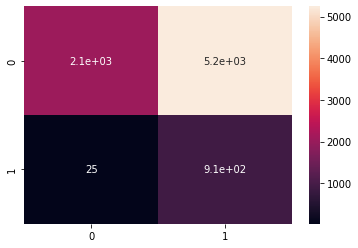

36.0082554328032
30.904747593027544
for valdilating alpha value  4 i.e 0.9
for training set 1
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1
printing w [[-48.280986664740624, -223.41693708169885, 0.14065038794365214, -69.96779243399705, 107.99044398707733, 47.44851813550993, -199.70967304864115, 121.20747121978944, -3.6481212210105065, 41.414204377375285, -184.8475706517936, -174.67896396826873, -23.578668579829507, -13.566425834842065, -33.78166418373758, -17.207650117217554, -20.69334005870786, -74.88908327530679, -7.442084283148447, -111.54949960375463, -22.907419372122536, -1.5085021113292398, -38.64850274294534, 245.50842794621644, -205.6433081379395, -1.4194601384912668, -49.73885136883303, -38.58938134584218, -130.81934468689755, -189.07248233798512, 0.13488151777514273, -74.31997251955514, -190.30575285831014, -13.746522170562617, 203.65837516430648, -203.56611264844074, -0.05705243781991692, -336.58680194732005, -12.623600647079652, 349.9924295731478, 77.25907863821763, -12.871263303661223, -64.75459157942879, 323.70041245041847, -323.97381085331955, -25.136566737956183, -134.06490965514186, 0.969961351094

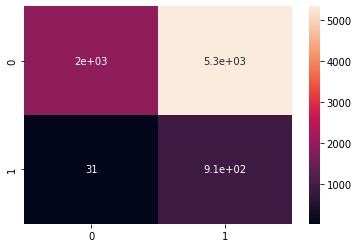

34.75358096625394
for training set 2
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1
printing w [[-50.98925465887821, -229.3685640272841, 0.14065038794365214, -72.12438416380385, 112.65566775414825, 50.5083001454136, -209.20517847393228, 125.78416330229334, -4.36897636808656, 43.33570152667768, -193.98271179669126, -180.45771541950947, -24.445129334074444, -15.192938936562774, -34.32119599199193, -17.704739367020448, -21.390969882774176, -77.68576839904712, -7.460815048407374, -117.37856167852598, -25.68099895386829, -1.6457617357054206, -40.61871242477355, 257.47129442789486, -215.49788459933754, -1.5575404769438266, -50.94272897396713, -41.444744956845014, -135.64395454850813, -195.9918807736079, 0.13488151777514273, -79.36120487876103, -199.76275473370293, -14.141472926713845, 213.32520949541853, -213.2329469795528, -0.05705243781991692, -354.2664165493904, -12.832613500448662, 367.8810570285872, 80.42180440907262, -13.080276157030234, -67.70830449691474, 338.33365723545086, -338.60705563835194, -25.803971088553393, -139.4314772776915, 1.1714315703162317, -

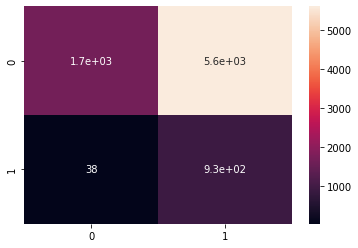

31.524641903374608
for training set 3
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1
printing w [[-52.34306159374231, -237.3841603306342, 0.14065038794365214, -74.13238615673747, 115.92691413224752, 51.62627641360021, -216.97123554954322, 129.6495470632744, -5.022019330328693, 45.50946404765971, -202.85563610686523, -185.06476557738347, -24.91450604959731, -16.805635621035837, -35.34896666294156, -17.776339628651463, -21.86086029652627, -80.13614178395385, -7.385748955900694, -121.05188790998059, -27.848237744135407, -1.8187226305858013, -42.66753666129962, 268.07604293408093, -223.8259012723255, -1.7854480736155625, -52.480673370300835, -42.70312648787161, -140.33123677786276, -198.07021716732555, 0.13488151777514273, -84.6617572495562, -210.30203507063462, -14.259838091933283, 221.3674998607158, -221.27523734485007, -0.05705243781991692, -367.6030196544139, -13.324326085679658, 381.7093727188418, 83.55936036222256, -13.57198874226123, -70.35414786483372, 351.55188019250994, -351.825278595411, -26.69272594342272, -144.59173102839281, 1.3390521483912694, -93.3

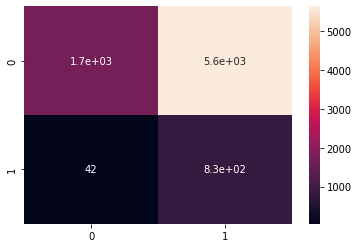

30.94197620781743
for training set 4
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1
printing w [[-49.431655510285246, -244.374016148035, 0.14065038794365214, -76.00879951598995, 119.62305801210425, 53.826188917128704, -221.20831840177573, 133.65341678072244, -4.32472571905508, 47.62084469018453, -207.30300481979953, -188.30286442631322, -26.08409250776067, -17.812900488193247, -35.63047571113299, -18.188727059784423, -22.273303079869365, -82.18923816233443, -7.180848888965751, -126.36812017643834, -28.546487675607, -1.8204871855362044, -43.392263218263594, 275.84189370208577, -230.81135482942443, -1.8411187275586391, -53.57234134213893, -43.44021275746376, -141.98478563426238, -203.34382469099313, 0.13488151777514273, -89.70415214026583, -215.15744449919214, -14.439224365345844, 227.44338269535828, -227.35112017949254, -0.05705243781991692, -379.6552603913802, -13.870537819707481, 394.30782518983585, 86.16186146590059, -14.118200476289053, -72.41043723448392, 360.242071618297, -360.5154700211981, -28.405896309227774, -147.86257326642476, 1.425069425039282, -9

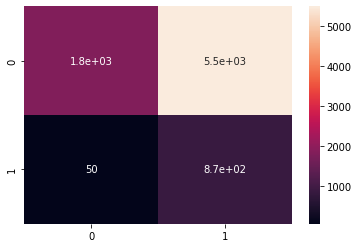

32.706082311521186
for training set 5
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1
printing w [[-51.11458477341801, -253.3897258980128, 0.14065038794365214, -79.66770423394195, 126.86187827084518, 60.32830750816558, -224.35242992647764, 140.9689535304799, -0.6935171147037295, 49.317737706263, -212.04470839761368, -191.8048700725555, -26.901398319081885, -18.86272163883388, -38.62903532756427, -18.381814274883865, -23.26705872104194, -83.4759384191076, -7.5839106488188035, -129.0860706893172, -29.421065110192718, -1.8213773319482154, -45.453238475951395, 283.4360839626666, -236.15139848523583, -2.0342900746407597, -55.17156267447102, -44.91136082001556, -144.84717738649894, -207.152082473932, 0.13488151777514273, -91.55680816697395, -222.7113462592105, -14.871066417784983, 232.48810377883885, -232.3958412629731, -0.05705243781991692, -391.0229431215577, -14.711092658401988, 406.5160627587082, 89.16517965062643, -14.95875531498356, -74.57320058051535, 365.84695328498873, -366.1203516878898, -30.153220148809655, -151.1402701084762, 1.6233955697444775, -96.68625

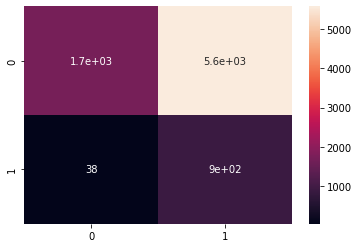

31.819837319412407
32.349223741675914


[47.31029757161026,
 34.69428251180884,
 30.97261384577309,
 30.904747593027544,
 32.349223741675914]

In [ ]:
import math
import random
import array as arr
import numpy as np
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
test_pre=[]

def test(x_test,y_test,w):
    print("printing w",w)
    test_y=[]
    h=[]
    m=x_test.shape[0]
    y_test=np.array(y_test)
    for i in range(0,m):
        dd=np.zeros(2)
        for j in range(0,2):
            hypo=w[j][0]
            for k in range(1,b):
                #print(x_test[i][k],w[j][k+1])
                hypo+=w[j][k+1]*x_test[i][k]
            #print(hypo,"hypo")
            h.append(hypo)
            g=sigmoid(hypo)
            #print("print  g",g,"end of printing g")
            dd[j]=g
        a=dd[0]
        bb=dd[1]
        #print(dd[0]," ",dd[1])
        if(dd[0]>dd[1]):
            test_y.append(0)
        else:
            test_y.append(1)

    mse=mean_squared_error(y_test,test_y)
    print("mean square error-",mse)
    per_err=0
    for i in range(0,m):
        if(y_test[i]==test_y[i]):
            per_err+=1
    print("percentage error is-",per_err/y_test.shape[0]*100)  
    confusion_mat=confusion_matrix(y_test,test_y )
    print(confusion_mat)
    sn.heatmap(confusion_mat, annot=True)
    plt.show()
    accuracy=(confusion_mat[0][0]+confusion_mat[1][1])/(confusion_mat[0][0]+confusion_mat[1][1]+confusion_mat[0][1]+confusion_mat[1][0])
    print(accuracy*100)
    test_pre=test_y
    
    return accuracy*100

cost=1
b=63
w3=[]
for i in range(0,2):
    xx=[]
    for j in range(0,b+1):
        xx.append(random.uniform(-0.3,0.3))
    w3.append(xx)

print(len(w3))
def learning_slp(train,y_train,w,cost,alpha):
    a=train.shape[0]
    err=0
    for i in range(0,a):
        
        d=[0,0]
        for j in range(0,2):
            hypo=w[j][0]
            for k in range(1,b):
                hypo+=w[j][k+1]*train[i][k]
            d[j]=sigmoid(hypo)
        for j in range(0,2):
            for k in range(0,b+1):
                if(k==b):
                    w[j][k]+=alpha*(y_train[i]-d[j])*train[i][k-1]*(d[j]*(1-d[j]))
                else:
                    w[j][k]+=alpha*(y_train[i]-d[j])*train[i][k]*(d[j]*(1-d[j]))

        err_new=0
        #y_train_inst=pd.get_dummies(y_train)
        for j in range(0,2):
            err_new+=(d[j]*y_train[i])**2   
        

test_score=[0,0,0,0,0]
alpha_val=[0.1,0.3,0.5,0.7,0.9]
for k in range(0,len(alpha_val)):
    
    print("for valdilating alpha value ",k,"i.e",alpha_val[k])
    for j in range(0,5):
        print("for training set",j+1)
       
        for i in range(0,2):
            #test_score[k]=test_score[k]+test(X_test[j],y_test[j],w3)
            print("epoch-",i)
            learning_slp(X_train[j],y_train[j],w3,0,alpha_val[k])
        test_score[k]=test_score[k]+test(X_test[j],y_test[j],w3)
        #print(test_score[k])
    test_score[k]=test_score[k]/5
    print(test_score[k])

test_score

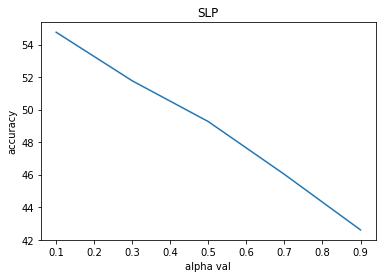

In [ ]:
import matplotlib.pyplot as plt
x=alpha_val
y=test_score
plt.plot(x, y)
plt.xlabel('alpha val')

plt.ylabel('accuracy')
 
# giving a title to my graph
plt.title('SLP')
plt.show()

In [ ]:
avgg=0
for i in range(0,5):
    avgg+=test_score[i]
print(avgg/5)    

35.24623305277913


63
for valdilating alpha value  0 i.e 0.1
for training set 1
epoch- 0
epoch- 1
[[5651 1645]
 [ 575  367]]


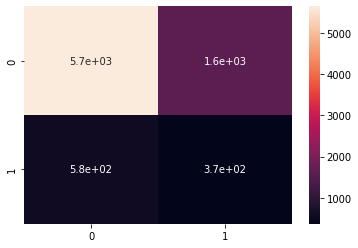

for training set 2
epoch- 0
epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[4153 3121]
 [ 589  375]]


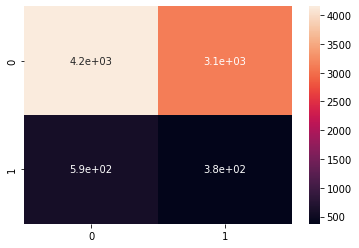

for training set 3
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[2339 5023]
 [ 106  770]]


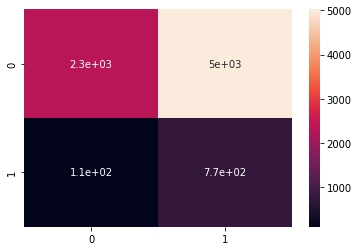

for training set 4
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[4187 3128]
 [ 568  354]]


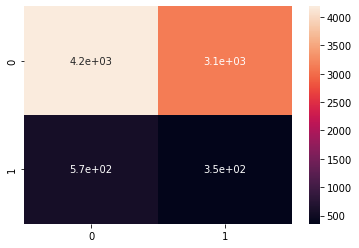

for training set 5
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[3623 3678]
 [ 203  733]]


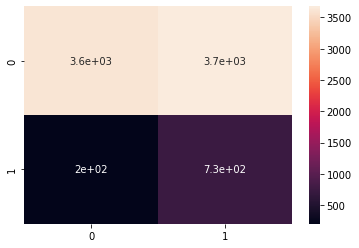

54.75377549468211
for valdilating alpha value  1 i.e 0.3
for training set 1
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[4559 2737]
 [ 470  472]]


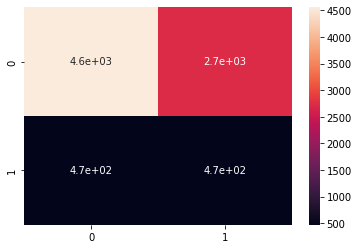

for training set 2
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[4153 3121]
 [ 589  375]]


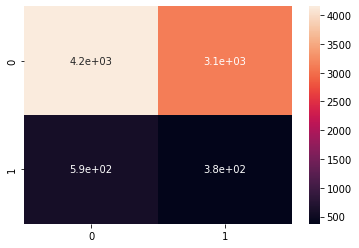

for training set 3
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[2155 5207]
 [ 104  772]]


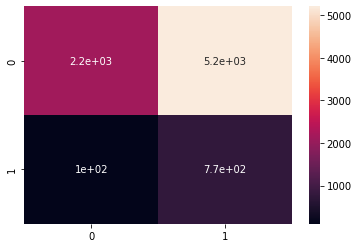

for training set 4
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[4131 3184]
 [ 573  349]]


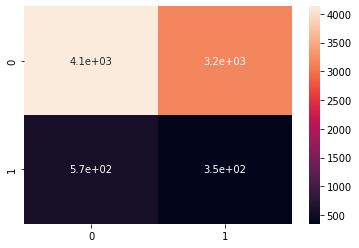

for training set 5
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[3623 3678]
 [ 203  733]]


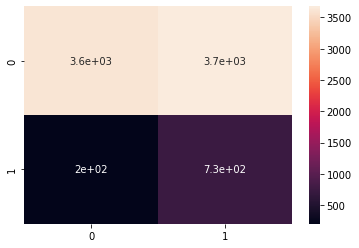

51.76759582580898
for valdilating alpha value  2 i.e 0.5
for training set 1
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[3860 3436]
 [ 388  554]]


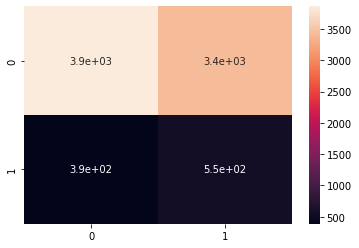

for training set 2
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[4153 3121]
 [ 589  375]]


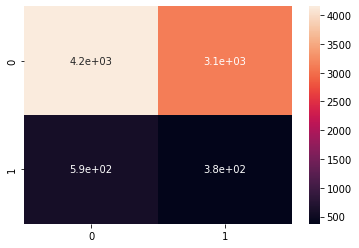

for training set 3
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[2155 5207]
 [ 104  772]]


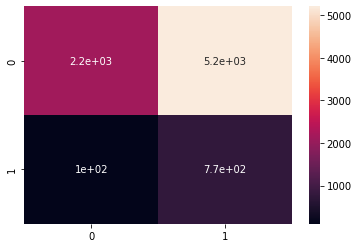

for training set 4
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[3625 3690]
 [ 483  439]]


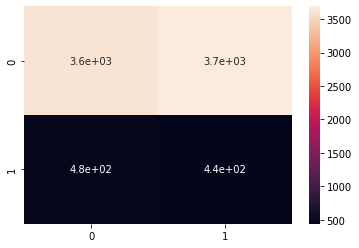

for training set 5
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[3623 3678]
 [ 203  733]]


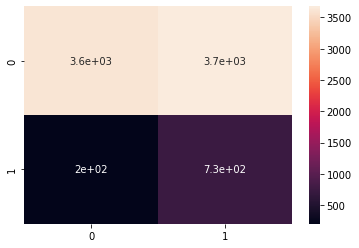

49.2595829493239
for valdilating alpha value  3 i.e 0.7
for training set 1
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[2955 4341]
 [ 284  658]]


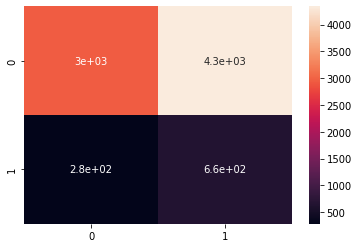

for training set 2
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[4153 3121]
 [ 589  375]]


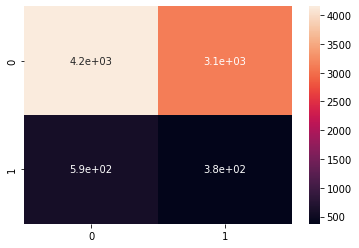

for training set 3
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[2155 5207]
 [ 104  772]]


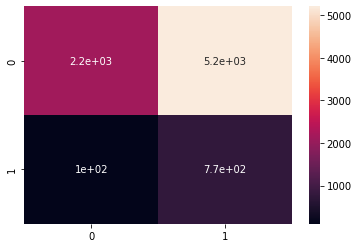

for training set 4
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[2984 4331]
 [ 377  545]]


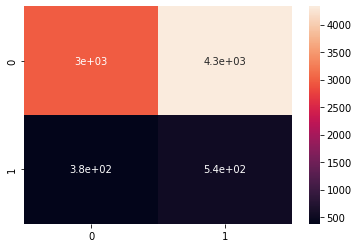

for training set 5
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[3623 3678]
 [ 203  733]]


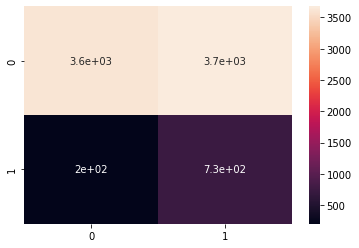

46.01591955813281
for valdilating alpha value  4 i.e 0.9
for training set 1
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[2026 5270]
 [ 198  744]]


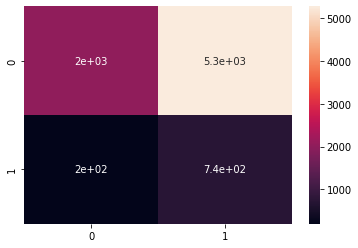

for training set 2
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[4153 3121]
 [ 589  375]]


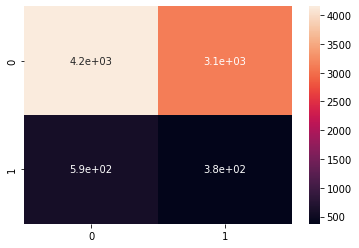

for training set 3
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[2156 5206]
 [ 104  772]]


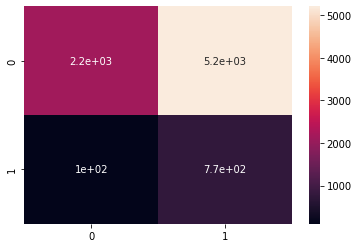

for training set 4
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[2322 4993]
 [ 279  643]]


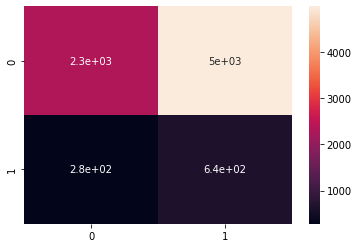

for training set 5
epoch- 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


epoch- 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


[[3623 3678]
 [ 203  733]]


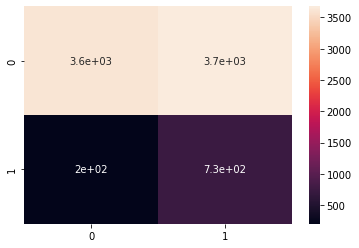

42.602303458276296


[54.75377549468211,
 51.76759582580898,
 49.2595829493239,
 46.01591955813281,
 42.602303458276296]

In [ ]:
import math
import numpy as np
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
test_pre=[]

def test(x_test,y_test,test_y,w):
    test_y=[]
    h=[]
    m=x_test.shape[0]
    y_test=np.array(y_test)
    for i in range(0,m):
        hypo=0
        for j in range(0,b):
            hypo+=w[j]*x_test[i][j]
        h.append(hypo)
        g=sigmoid(hypo)
        
        if(g>=0.5):
            g=1
        else:
            g=0   
        test_y.append(g)

    mse=mean_squared_error(y_test,test_y)
    #print("mean square error-",mse)
    per_err=0
    for i in range(0,m):
        if(y_test[i]==test_y[i]):
            per_err+=1
    #print("percentage error is-",per_err/y_test.shape[0]*100)  
    confusion_mat=confusion_matrix(y_test,test_y )
    print(confusion_mat)
    sn.heatmap(confusion_mat, annot=True)
    plt.show()
    accuracy=(confusion_mat[0][0]+confusion_mat[1][1])/(confusion_mat[0][0]+confusion_mat[1][1]+confusion_mat[0][1]+confusion_mat[1][0])
    #print(accuracy*100)
    test_pre=test_y
    return accuracy*100

cost=1

w1=[]
print(b)
for i in range(0,b):
    w1.append(random.uniform(-0.3,0.3))


def learning_logistic_reg(train,y_train,w,cost,alpha):
    a=train.shape[0]
    y_pred=[]
    h=[]
    for i in range(0,a):
        hypo=0
        for j in range(0,b):
            hypo+=w[j]*train[i][j]
        h.append(hypo)
        g=sigmoid(hypo)
        
        if(g>=0.5):
            g=1
        else:
            g=0   
        y_pred.append(g) 
    
    cost_itr=0
    for i in range(0,a):
        if(h[i]<0):
            cost_itr+=(1-y_train[i])*math.log((1-h[i]))
        else:
            cost_itr+=(y_train[i]*math.log(h[i]))
    cost_itr=cost_itr/(a)
    log_loss_itr=log_loss(y_train,y_pred)
    #print("cost ",cost_itr)
    #print("logg loss",log_loss_itr)

    for i in range(0,b):
        temp=0
        for j in range(0,a):
            temp+=(y_train[i]-h[i])*train[j][i]
        temp=alpha*temp/a
        w[i]=w[i]+temp    
            
    if(abs(log_loss_itr-cost)>0.001):
        return

test_score=[0,0,0,0,0]
alpha_val=[0.1,0.3,0.5,0.7,0.9]
for k in range(0,len(alpha_val)):
    
    print("for valdilating alpha value ",k,"i.e",alpha_val[k])
    for j in range(0,5):
        print("for training set",j+1)
    
        for i in range(0,2):
        
            print("epoch-",i)
            learning_logistic_reg(X_train[j],y_train[j],w1,1,alpha_val[k])
        test_score[k]=test_score[k]+test(X_test[j],y_test[j],test_y,w1)
       # print(test_score[k])
    test_score[k]=test_score[k]/5
    print(test_score[k])

test_score

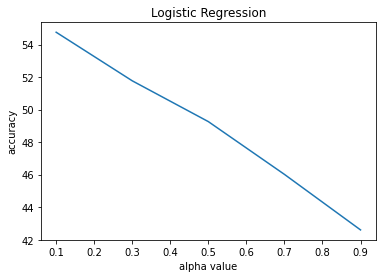

In [ ]:
import matplotlib.pyplot as plt
x=alpha_val
y=test_score
plt.plot(x, y)
plt.xlabel('alpha value')

plt.ylabel('accuracy')
 
# giving a title to my graph
plt.title('Logistic Regression')
plt.show()

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
url = 'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'
df = pd.read_csv(url, index_col=0)

ohe=pd.get_dummies(df)    # one hot encoding for the categorical feature data
y=ohe['y']
y=np.array(y)
scaler = preprocessing.RobustScaler()   #robust scaling normlisation
robust_df = scaler.fit_transform(ohe)
robust_df = pd.DataFrame(robust_df)
model=LogisticRegression()
data=np.array(robust_df)
model_params = {
    'mlp': {
        'model':MLPClassifier(random_state=1, max_iter=300),
        'params' : {
            'alpha': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'alpha': [1,5,10]
        }
    }
}

scores = []

for model_name, mp in model_params.items():
    print(mp[model],mp[params])
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(data,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
   
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
url = 'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'
df = pd.read_csv(url, index_col=0)

ohe=pd.get_dummies(df)    # one hot encoding for the categorical feature data
y=ohe['y']
y=np.array(y)
scaler = preprocessing.RobustScaler()   #robust scaling normlisation
robust_df = scaler.fit_transform(ohe)
robust_df = pd.DataFrame(robust_df)
model=LogisticRegression()
data=np.array(robust_df)
model_params = {
    'slp': {
        'model':Perceptron(tol=1e-3, random_state=0),
        'params' : {
            'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
        }
    },

    'mlp': {
        'model':MLPClassifier(random_state=1, max_iter=300,solver='sgd'),
        'params' : {
            'hidden_layer_sizes': [1,2,6,8,10,11,20,25]
        }
    },

    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1,2,4,0.625,0.714]
        }
    }
}

scores = []
model=[]
i=0

for model_name, mp in model_params.items():
    #print(mp['model'],mp['params'])
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(data,y)
    
    model.append( pd.DataFrame(clf.cv_results_))
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    i=i+1
   
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_p

,model,best_score,best_params
0,slp,0.994319,{'alpha': 0.1}
1,mlp,0.986695,{'hidden_layer_sizes': 2}
2,logistic_regression,1.000000,{'C': 4}


In [ ]:
model[0]
model[0][['params','mean_test_score']]

,params,mean_test_score
0,{'alpha': 0.1},0.994319
1,{'alpha': 0.2},0.994319
2,{'alpha': 0.3},0.994319
3,{'alpha': 0.4},0.994319
4,{'alpha': 0.5},0.994319
5,{'alpha': 0.6},0.994319
6,{'alpha': 0.7},0.994319
7,{'alpha': 0.8},0.994319


In [ ]:
model[1]
model[1][['params','mean_test_score']]

,params,mean_test_score
0,{'hidden_layer_sizes': 1},0.966982
1,{'hidden_layer_sizes': 2},0.986695
2,{'hidden_layer_sizes': 6},0.986671
3,{'hidden_layer_sizes': 8},0.986695
4,{'hidden_layer_sizes': 10},0.986695
5,{'hidden_layer_sizes': 11},0.986695
6,{'hidden_layer_sizes': 20},0.986622
7,{'hidden_layer_sizes': 25},0.908615


In [ ]:
model[0]
model[2][['params','mean_test_score']]

,params,mean_test_score
0,{'C': 1},0.999976
1,{'C': 2},0.999951
2,{'C': 4},1.000000
3,{'C': 0.625},0.999976
4,{'C': 0.714},0.999951
